In [2]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

from fastf1 import utils
from matplotlib import pyplot as plt

# FORMULA 1 LENOVO GRANDE PRÊMIO DE SÃO PAULO 2024
The Grand Prix of São Paulo (formerly Grand Prix of Brazil, in Portuguese: Grande Prêmio do Brasil) is a motor racing race held in Brazil since 1972, which has been valid for the Formula 1 World Championship since 1973. It is currently held at the Autódromo José Carlos Pace in Interlagos (city of São Paulo); previously it was also held at the Autódromo Internacional Nelson Piquet in Jacarepaguá, Rio de Janeiro.
Traditionally, the Brazilian Grand Prix was held in the autumn, opening the season or within the first three rounds of the championship. In 2004, it was held at the end of the season due to improvements to the facilities at Interlagos; however, due to the greater public success of the switch to spring, it has continued to be held towards the end of the season since then, often as the closing race. As a result, it has been the venue for defining the champion frequently in recent years. Examples include Vettel's three-time championship, Fernando Alonso's two-time championship, and the championships of Kimi Räikkonen, Lewis Hamilton and Jenson Button.
The most victorious driver in the race is Frenchman Alain Prost, with six wins. Argentina's Carlos Reutemann and Germany's Michael Schumacher follow with four wins each. The Brazilian Grand Prix winners are champions Emerson Fittipaldi, Nelson Piquet and Ayrton Senna, as well as José Carlos Pace and Felipe Massa. Sao Paulo's Rubens Barrichello competed 17 times at Interlagos, with a best finish of third in 2004 and 11 retirements.
From 2021 it will be renamed the ‘Grand Prix of São Paulo’.

Source: Wikipedia

## Upgrades
In this section those upgrades brought by the teams will be shown.
<table>
<tr>
    <td>
    Team
    </td>
    <td>
    Updated component
    </td>
    <td>
    Upgrade type
    </td>
</tr>
<tr>
    <td>
    McLaren
    </td>
    <td>
    Rear Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>

<tr>
    <td>
    McLaren
    </td>
    <td>
    Beam Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    McLaren
    </td>
    <td>
    Beam Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Front suspension
    </td>
    <td>
    Performance
    </td>
</tr>

<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Beam Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
</table>

## Obtain session information

In [4]:
libraryDataF1.obtain_information('sessions',year=2024,country_acronym='BRA')

,session_key,session_name,date_start,date_end,gmt_offset,session_type,meeting_key,location,country_key,country_code,country_name,circuit_key,circuit_short_name,year
0,9626,Practice 1,2024-11-01T14:30:00+00:00,2024-11-01T15:30:00+00:00,-03:00:00,Practice,1249,São Paulo,10,BRA,Brazil,14,Interlagos,2024


## Free Practice 1
### Obtain setup

In [63]:
practice = libraryDataF1.obtain_information('laps',session_key=9626)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9626)
drivers = libraryDataF1.obtain_information('drivers',session_key=9626)

In [64]:
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==50,'team_name'] = 'Haas'

In [65]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1249,9626,77,262.0,194,NaN,2024-11-01T14:30:04.073000+00:00,NaN,True,NaN,47.213,18.548,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2051, 2051, 2051]","[2051, 2051, 2051, 2051, 2049]",1,MEDIUM,BOT,Valtteri BOTTAS,Kick Sauber
1,1249,9626,10,282.0,198,NaN,2024-11-01T14:30:15.221000+00:00,NaN,True,NaN,51.940,18.429,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 0]",1,MEDIUM,GAS,Pierre GASLY,Alpine
2,1249,9626,24,240.0,153,NaN,2024-11-01T14:30:20.644000+00:00,NaN,True,NaN,49.274,19.267,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2048, 2048, 2048, 2049, 0]",1,MEDIUM,ZHO,ZHOU Guanyu,Kick Sauber
3,1249,9626,31,271.0,190,NaN,2024-11-01T14:30:24.402000+00:00,NaN,True,NaN,50.835,18.624,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2051, 2051, 2051]",1,MEDIUM,OCO,Esteban OCON,Alpine
4,1249,9626,18,285.0,169,NaN,2024-11-01T14:30:29.379000+00:00,NaN,True,NaN,52.846,26.771,"[2064, 2064, 2064, 2064, 2064, 2064, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049]",1,HARD,STR,Lance STROLL,Aston Martin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1249,9626,16,306.0,155,211.0,2024-11-01T15:33:16.927000+00:00,113.402,False,38.041,49.457,25.904,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],31,SOFT,LEC,Charles LECLERC,Ferrari
556,1249,9626,44,233.0,247,246.0,2024-11-01T15:33:30.523000+00:00,90.023,False,24.801,41.379,23.843,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],30,MEDIUM,HAM,Lewis HAMILTON,Mercedes
557,1249,9626,24,301.0,176,248.0,2024-11-01T15:33:32.776000+00:00,NaN,False,21.798,46.632,NaN,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],27,SOFT,ZHO,ZHOU Guanyu,Kick Sauber
558,1249,9626,22,NaN,182,252.0,2024-11-01T15:33:38.375000+00:00,92.873,False,22.136,45.515,25.222,"[None, 2048, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],25,SOFT,TSU,Yuki TSUNODA,RB


### See race pace by means of the charts

### Medium tyres

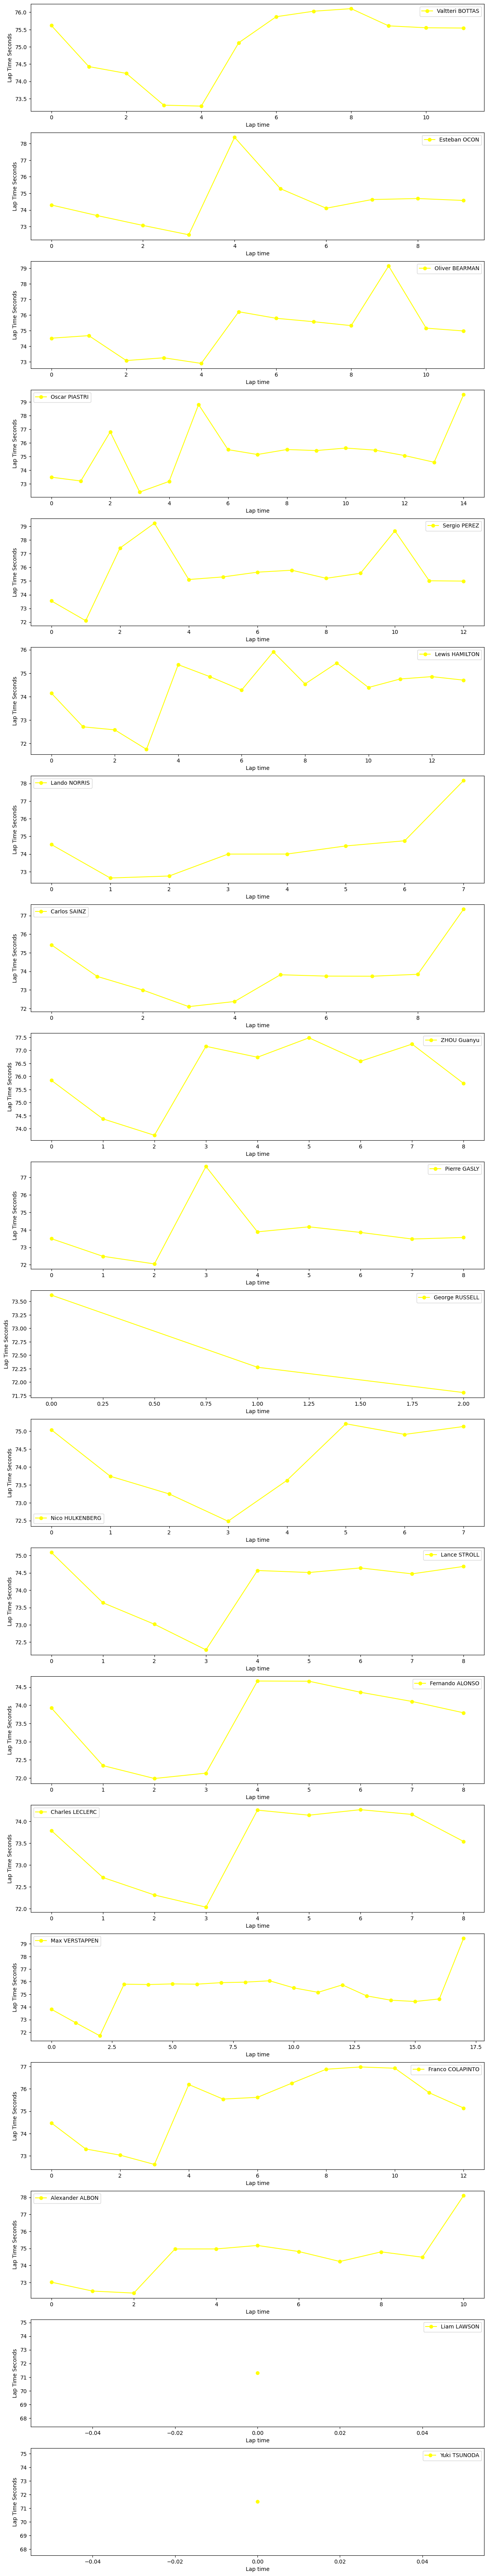

In [66]:
libraryDataF1.obtain_data_tyres(jointables2,"MEDIUM",80)

### Soft tyres

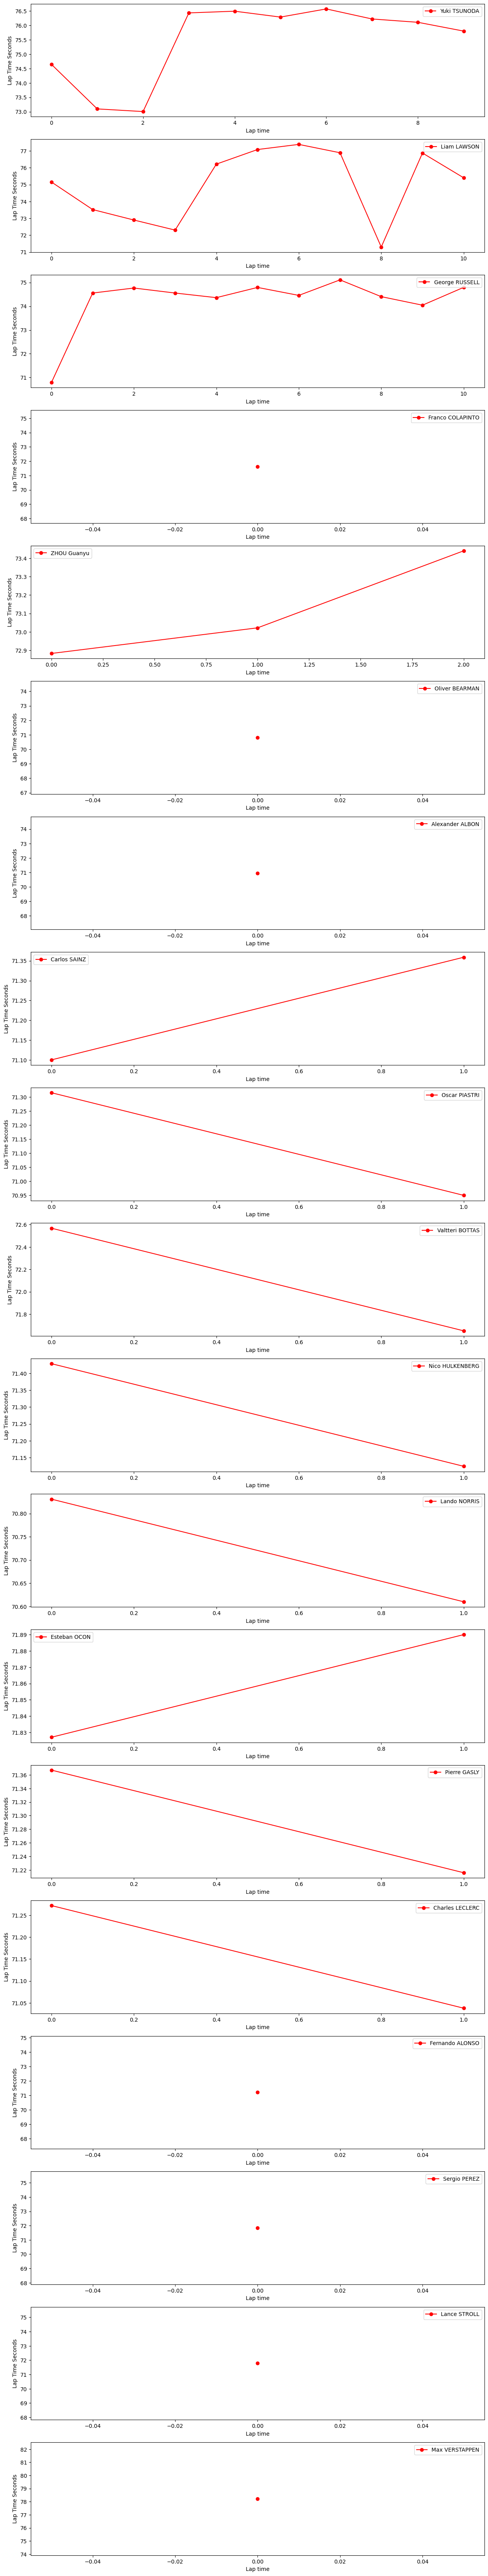

In [67]:
libraryDataF1.obtain_data_tyres(jointables2,"SOFT",80)

### Hard tyres

In [68]:
#libraryDataF1.obtain_data_tyres(jointables2,"HARD",99)

### Speed trap

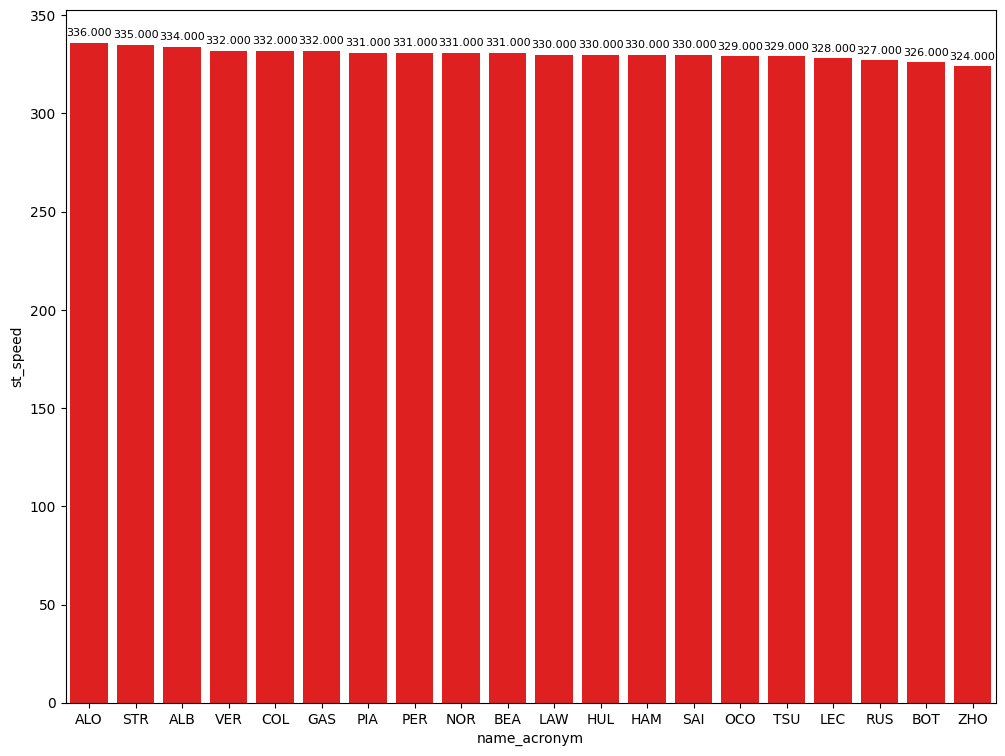

In [69]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

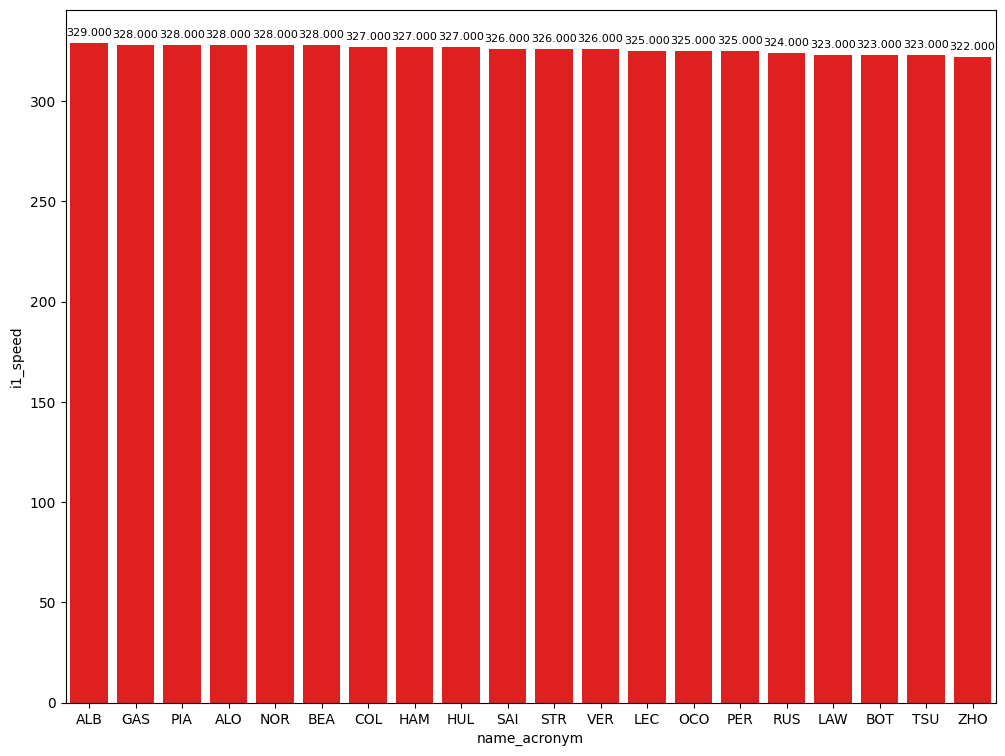

In [70]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

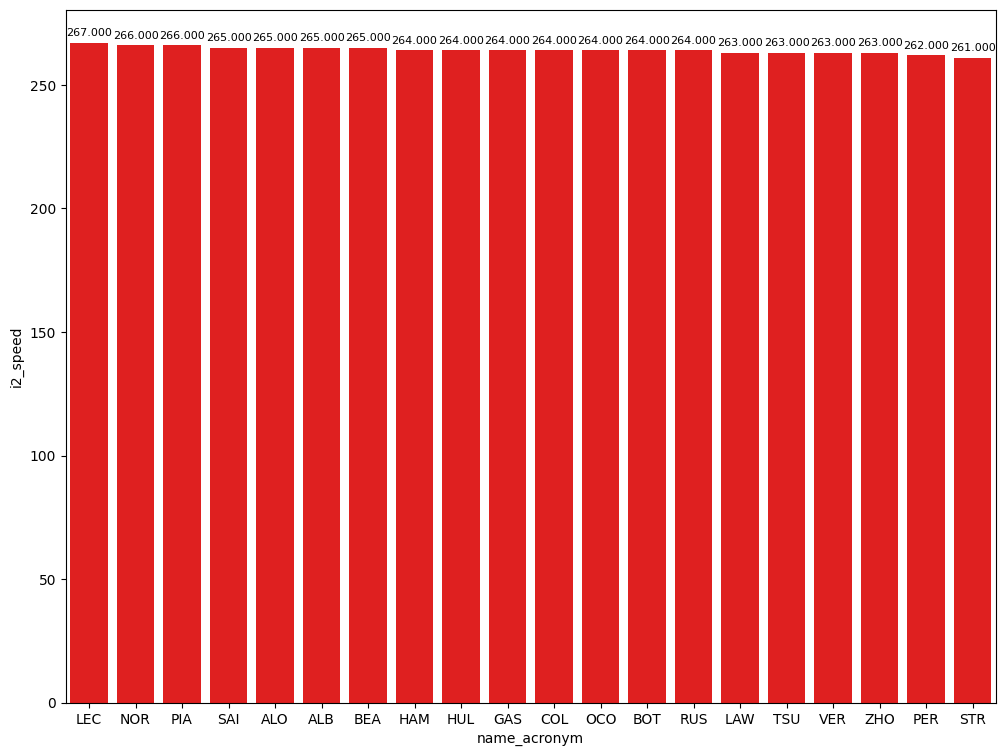

In [71]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [72]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
24,Fernando ALONSO,HARD,46.773,52.645,18.372,117.790
434,Liam LAWSON,MEDIUM,18.412,36.493,16.396,71.301
508,Lando NORRIS,SOFT,18.046,36.194,16.370,70.610


### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [73]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


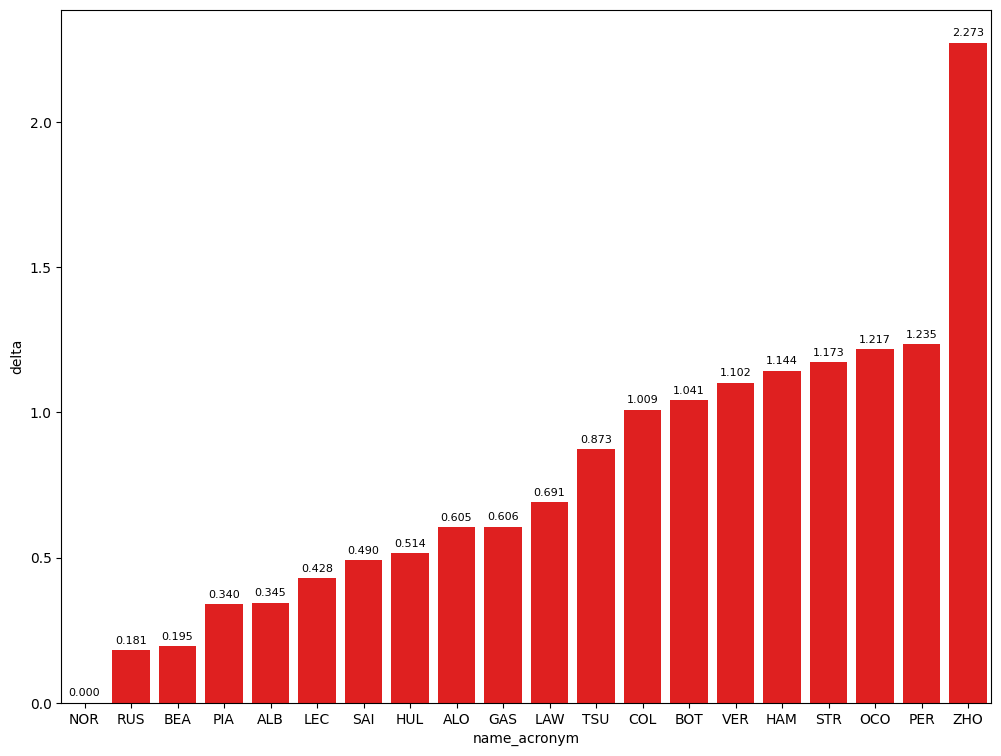

In [74]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector. Also, each sector will be commented. As we can see in the free practice, these data  are not very representative due to the changing conditions.


In [75]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

,duration_sector_1,full_name,compound,lap_duration,lap_number
508,18.046,Lando NORRIS,SOFT,70.610,27
424,18.145,Alexander ALBON,SOFT,70.955,22
487,18.154,Max VERSTAPPEN,SOFT,78.221,27
519,18.164,Nico HULKENBERG,SOFT,71.124,24
504,18.210,Charles LECLERC,SOFT,71.038,28
453,18.255,Fernando ALONSO,SOFT,71.215,22
526,18.276,Carlos SAINZ,SOFT,112.766,29
490,18.289,Oscar PIASTRI,SOFT,70.950,27
476,18.315,Yuki TSUNODA,MEDIUM,71.483,21
484,18.321,Lance STROLL,SOFT,71.783,25


In [76]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

,duration_sector_2,full_name,compound,lap_duration,lap_number
330,36.023,George RUSSELL,SOFT,70.791,10
420,36.143,Oliver BEARMAN,SOFT,70.805,24
508,36.194,Lando NORRIS,SOFT,70.610,27
487,36.235,Max VERSTAPPEN,SOFT,78.221,27
490,36.242,Oscar PIASTRI,SOFT,70.950,27
425,36.314,Carlos SAINZ,SOFT,71.100,24
514,36.425,Pierre GASLY,SOFT,71.216,25
519,36.447,Nico HULKENBERG,SOFT,71.124,24
452,36.459,Charles LECLERC,SOFT,71.272,25
433,36.493,Liam LAWSON,SOFT,71.301,20


In [77]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

,duration_sector_3,full_name,compound,lap_duration,lap_number
420,16.176,Oliver BEARMAN,SOFT,70.805,24
504,16.238,Charles LECLERC,SOFT,71.038,28
424,16.238,Alexander ALBON,SOFT,70.955,22
453,16.246,Fernando ALONSO,SOFT,71.215,22
447,16.305,Lando NORRIS,SOFT,70.831,24
437,16.339,Oscar PIASTRI,SOFT,71.315,24
514,16.367,Pierre GASLY,SOFT,71.216,25
433,16.396,Liam LAWSON,SOFT,71.301,20
425,16.402,Carlos SAINZ,SOFT,71.100,24
330,16.440,George RUSSELL,SOFT,70.791,10


### Mean pace with the different compound used on the session

In [78]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 74 and lap_duration <=77.5").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
MEDIUM,75.260302
SOFT,75.574040


### Long runs

In [79]:
MINIMUN_SECONDS = 74
MAXIMUM_SECONDS = 77.5

#### Red Bull Racing

In [80]:
stintInformation.query('driver_number == 1 or driver_number == 11')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
3,1249,9626,1,11,1,4,MEDIUM,0
4,1249,9626,1,1,1,6,MEDIUM,0
23,1249,9626,2,11,5,7,MEDIUM,3
28,1249,9626,2,1,7,10,MEDIUM,5
31,1249,9626,3,11,8,12,MEDIUM,6
46,1249,9626,3,1,11,26,MEDIUM,9
54,1249,9626,4,11,13,23,MEDIUM,11
79,1249,9626,5,11,24,26,SOFT,0
91,1249,9626,4,1,27,28,SOFT,0
93,1249,9626,6,11,27,29,MEDIUM,22


In [81]:
libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
201,Max VERSTAPPEN,MEDIUM,2024-11-01T14:56:27.197000+00:00,11,19.395,39.158,17.253,75.806
211,Max VERSTAPPEN,MEDIUM,2024-11-01T14:57:43.082000+00:00,12,19.333,39.033,17.408,75.774
222,Max VERSTAPPEN,MEDIUM,2024-11-01T14:58:58.755000+00:00,13,19.332,39.244,17.249,75.825
233,Max VERSTAPPEN,MEDIUM,2024-11-01T15:00:14.675000+00:00,14,19.433,39.085,17.285,75.803
246,Max VERSTAPPEN,MEDIUM,2024-11-01T15:01:30.463000+00:00,15,19.388,39.168,17.368,75.924
261,Max VERSTAPPEN,MEDIUM,2024-11-01T15:02:46.302000+00:00,16,19.299,39.284,17.382,75.965
278,Max VERSTAPPEN,MEDIUM,2024-11-01T15:04:02.356000+00:00,17,19.344,39.304,17.424,76.072
294,Max VERSTAPPEN,MEDIUM,2024-11-01T15:05:18.346000+00:00,18,19.364,38.923,17.222,75.509
311,Max VERSTAPPEN,MEDIUM,2024-11-01T15:06:33.964000+00:00,19,19.279,38.807,17.072,75.158
329,Max VERSTAPPEN,MEDIUM,2024-11-01T15:07:49.064000+00:00,20,19.053,39.246,17.450,75.749


In [82]:
libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
139,Sergio PEREZ,MEDIUM,2024-11-01T14:43:02.392000+00:00,8,18.465,36.923,22.025,77.413
249,Sergio PEREZ,MEDIUM,2024-11-01T15:01:52.156000+00:00,13,19.348,38.340,17.422,75.110
264,Sergio PEREZ,MEDIUM,2024-11-01T15:03:07.285000+00:00,14,19.258,38.519,17.523,75.300
282,Sergio PEREZ,MEDIUM,2024-11-01T15:04:22.557000+00:00,15,19.346,38.807,17.493,75.646
299,Sergio PEREZ,MEDIUM,2024-11-01T15:05:38.252000+00:00,16,19.270,39.143,17.376,75.789
315,Sergio PEREZ,MEDIUM,2024-11-01T15:06:54.028000+00:00,17,19.340,38.660,17.198,75.198
333,Sergio PEREZ,MEDIUM,2024-11-01T15:08:09.135000+00:00,18,19.226,38.995,17.347,75.568
362,Sergio PEREZ,MEDIUM,2024-11-01T15:10:43.470000+00:00,20,19.460,38.457,17.099,75.016
374,Sergio PEREZ,MEDIUM,2024-11-01T15:11:58.470000+00:00,21,19.119,38.576,17.299,74.994


#### Ferrari

In [83]:
stintInformation.query('driver_number == 16 or driver_number == 55')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
10,1249,9626,1,16,1,8,MEDIUM,0
15,1249,9626,1,55,1,9,MEDIUM,0
34,1249,9626,2,16,9,13,MEDIUM,7
41,1249,9626,2,55,10,13,MEDIUM,8
58,1249,9626,3,16,14,22,MEDIUM,12
60,1249,9626,3,55,14,23,MEDIUM,12
77,1249,9626,4,16,23,32,SOFT,0
83,1249,9626,4,55,24,26,SOFT,0
97,1249,9626,5,55,27,31,SOFT,3


In [84]:
libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
313,Charles LECLERC,MEDIUM,2024-11-01T15:06:50.873000+00:00,16,19.172,37.924,17.160,74.256
331,Charles LECLERC,MEDIUM,2024-11-01T15:08:05.228000+00:00,17,19.145,37.938,17.057,74.140
346,Charles LECLERC,MEDIUM,2024-11-01T15:09:19.288000+00:00,18,19.201,37.929,17.136,74.266
361,Charles LECLERC,MEDIUM,2024-11-01T15:10:33.606000+00:00,19,19.168,37.907,17.082,74.157


In [85]:
libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
29,Carlos SAINZ,MEDIUM,2024-11-01T14:33:12.263000+00:00,2,19.400,38.870,17.156,75.426
400,Carlos SAINZ,MEDIUM,2024-11-01T15:16:20.987000+00:00,22,19.019,37.492,20.833,77.344


#### Mercedes

In [86]:
stintInformation.query('driver_number == 44 or driver_number == 63')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
16,1249,9626,1,63,1,9,MEDIUM,0
17,1249,9626,1,44,1,10,MEDIUM,0
40,1249,9626,2,63,10,12,SOFT,0
44,1249,9626,2,44,11,16,MEDIUM,9
57,1249,9626,3,63,13,25,SOFT,3
61,1249,9626,3,44,17,31,MEDIUM,0


In [87]:
libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
25,Lewis HAMILTON,MEDIUM,2024-11-01T14:32:52.575000+00:00,2,18.919,38.379,16.851,74.149
398,Lewis HAMILTON,MEDIUM,2024-11-01T15:15:24.753000+00:00,17,19.499,38.802,17.061,75.362
401,Lewis HAMILTON,MEDIUM,2024-11-01T15:16:40.065000+00:00,18,19.433,38.344,17.074,74.851
403,Lewis HAMILTON,MEDIUM,2024-11-01T15:17:54.917000+00:00,19,19.264,38.067,16.950,74.281
407,Lewis HAMILTON,MEDIUM,2024-11-01T15:19:09.272000+00:00,20,19.159,39.518,17.230,75.907
415,Lewis HAMILTON,MEDIUM,2024-11-01T15:20:25.111000+00:00,21,19.167,38.431,16.942,74.540
427,Lewis HAMILTON,MEDIUM,2024-11-01T15:21:39.649000+00:00,22,19.144,38.630,17.659,75.433
441,Lewis HAMILTON,MEDIUM,2024-11-01T15:22:55.086000+00:00,23,19.145,38.314,16.931,74.390
454,Lewis HAMILTON,MEDIUM,2024-11-01T15:24:09.513000+00:00,24,19.169,38.455,17.128,74.752
470,Lewis HAMILTON,MEDIUM,2024-11-01T15:25:24.293000+00:00,25,19.095,38.626,17.132,74.853


In [88]:
libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
406,George RUSSELL,SOFT,2024-11-01T15:18:40.932000+00:00,13,19.280,38.287,16.988,74.555
413,George RUSSELL,SOFT,2024-11-01T15:19:55.418000+00:00,14,19.362,38.469,16.935,74.766
421,George RUSSELL,SOFT,2024-11-01T15:21:10.231000+00:00,15,19.255,38.390,16.910,74.555
438,George RUSSELL,SOFT,2024-11-01T15:22:24.809000+00:00,16,19.057,38.464,16.840,74.361
451,George RUSSELL,SOFT,2024-11-01T15:23:39.094000+00:00,17,19.275,38.628,16.888,74.791
464,George RUSSELL,SOFT,2024-11-01T15:24:53.831000+00:00,18,19.117,38.333,17.006,74.456
477,George RUSSELL,SOFT,2024-11-01T15:26:08.369000+00:00,19,19.186,38.683,17.240,75.109
491,George RUSSELL,SOFT,2024-11-01T15:27:23.476000+00:00,20,19.134,38.429,16.840,74.403
502,George RUSSELL,SOFT,2024-11-01T15:28:37.813000+00:00,21,19.085,38.259,16.700,74.044
520,George RUSSELL,SOFT,2024-11-01T15:29:51.996000+00:00,22,19.093,38.593,17.108,74.794


#### McLaren

In [89]:
stintInformation.query('driver_number == 81 or driver_number == 4')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
11,1249,9626,1,81,1,8,MEDIUM,0
12,1249,9626,1,4,1,9,MEDIUM,0
33,1249,9626,2,81,9,11,MEDIUM,7
42,1249,9626,2,4,10,19,MEDIUM,8
51,1249,9626,3,81,12,23,MEDIUM,10
65,1249,9626,3,4,20,23,MEDIUM,18
78,1249,9626,4,4,24,26,SOFT,0
84,1249,9626,4,81,24,26,SOFT,0
95,1249,9626,5,4,27,30,SOFT,3
98,1249,9626,5,81,27,31,SOFT,0


In [90]:
libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
27,Lando NORRIS,MEDIUM,2024-11-01T14:33:05.003000+00:00,2,19.254,38.366,16.917,74.537
309,Lando NORRIS,MEDIUM,2024-11-01T15:06:26.729000+00:00,17,19.011,38.506,16.939,74.456
363,Lando NORRIS,MEDIUM,2024-11-01T15:10:44.109000+00:00,20,19.469,38.451,16.829,74.749


In [91]:
libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
114,Oscar PIASTRI,MEDIUM,2024-11-01T14:40:26.185000+00:00,7,18.713,37.467,20.626,76.806
266,Oscar PIASTRI,MEDIUM,2024-11-01T15:03:17.787000+00:00,14,19.815,38.668,17.017,75.500
285,Oscar PIASTRI,MEDIUM,2024-11-01T15:04:33.182000+00:00,15,19.309,38.801,17.033,75.143
301,Oscar PIASTRI,MEDIUM,2024-11-01T15:05:48.409000+00:00,16,19.393,39.035,17.080,75.508
317,Oscar PIASTRI,MEDIUM,2024-11-01T15:07:03.929000+00:00,17,19.375,38.992,17.066,75.433
335,Oscar PIASTRI,MEDIUM,2024-11-01T15:08:19.393000+00:00,18,19.491,39.036,17.089,75.616
351,Oscar PIASTRI,MEDIUM,2024-11-01T15:09:34.871000+00:00,19,19.449,38.893,17.119,75.461
365,Oscar PIASTRI,MEDIUM,2024-11-01T15:10:50.462000+00:00,20,19.124,39.052,16.888,75.064
377,Oscar PIASTRI,MEDIUM,2024-11-01T15:12:05.416000+00:00,21,19.093,38.714,16.768,74.575


#### Aston Martin

In [92]:
stintInformation.query('driver_number == 18 or driver_number == 14')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1249,9626,1,14,1,2,HARD,0
1,1249,9626,1,18,1,2,HARD,0
20,1249,9626,2,14,3,5,MEDIUM,0
21,1249,9626,2,18,3,5,MEDIUM,0
24,1249,9626,3,14,6,9,MEDIUM,3
25,1249,9626,3,18,6,10,MEDIUM,3
43,1249,9626,4,14,10,21,MEDIUM,7
45,1249,9626,4,18,11,22,MEDIUM,8
71,1249,9626,5,14,22,23,SOFT,0
74,1249,9626,5,18,23,27,SOFT,0


In [93]:
libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
303,Fernando ALONSO,MEDIUM,2024-11-01T15:06:02.534000+00:00,15,19.233,38.455,16.978,74.666
320,Fernando ALONSO,MEDIUM,2024-11-01T15:07:17.210000+00:00,16,19.258,38.509,16.894,74.661
338,Fernando ALONSO,MEDIUM,2024-11-01T15:08:31.928000+00:00,17,19.195,38.266,16.896,74.357
353,Fernando ALONSO,MEDIUM,2024-11-01T15:09:46.239000+00:00,18,19.133,38.070,16.901,74.104


In [94]:
libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
43,Lance STROLL,MEDIUM,2024-11-01T14:34:14.982000+00:00,3,19.345,37.978,17.766,75.089
318,Lance STROLL,MEDIUM,2024-11-01T15:07:12.801000+00:00,16,19.181,38.295,17.091,74.567
336,Lance STROLL,MEDIUM,2024-11-01T15:08:27.329000+00:00,17,19.251,38.194,17.064,74.509
352,Lance STROLL,MEDIUM,2024-11-01T15:09:41.875000+00:00,18,19.210,38.390,17.041,74.641
366,Lance STROLL,MEDIUM,2024-11-01T15:10:56.572000+00:00,19,19.115,38.294,17.061,74.470
378,Lance STROLL,MEDIUM,2024-11-01T15:12:11.010000+00:00,20,19.200,38.505,16.979,74.684


#### RB

In [95]:
stintInformation.query('driver_number == 30 or driver_number == 22')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
13,1249,9626,1,22,1,9,SOFT,0
14,1249,9626,1,30,1,9,SOFT,0
36,1249,9626,2,22,10,11,SOFT,8
37,1249,9626,2,30,10,12,SOFT,8
48,1249,9626,3,22,12,20,SOFT,10
52,1249,9626,3,30,13,18,SOFT,0
62,1249,9626,4,30,19,20,SOFT,17
64,1249,9626,5,30,20,22,MEDIUM,0
67,1249,9626,4,22,21,23,MEDIUM,0
75,1249,9626,6,30,23,27,SOFT,18


In [96]:
libraryDataF1.getinfolongruns(jointables2,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
54,Liam LAWSON,SOFT,2024-11-01T14:34:59.408000+00:00,2,19.309,38.726,17.117,75.152
218,Liam LAWSON,SOFT,2024-11-01T14:58:29.287000+00:00,13,19.721,39.181,17.311,76.213
228,Liam LAWSON,SOFT,2024-11-01T14:59:45.493000+00:00,14,19.693,39.911,17.474,77.078
241,Liam LAWSON,SOFT,2024-11-01T15:01:02.607000+00:00,15,19.917,39.895,17.570,77.382
253,Liam LAWSON,SOFT,2024-11-01T15:02:19.914000+00:00,16,19.775,39.812,17.300,76.887
494,Liam LAWSON,SOFT,2024-11-01T15:27:35.668000+00:00,23,20.263,39.306,17.302,76.871
505,Liam LAWSON,SOFT,2024-11-01T15:28:52.616000+00:00,24,19.471,38.933,16.999,75.403


In [97]:
libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
52,Yuki TSUNODA,SOFT,2024-11-01T14:34:49.640000+00:00,2,19.006,38.666,16.972,74.644
220,Yuki TSUNODA,SOFT,2024-11-01T14:58:54.374000+00:00,12,19.618,39.524,17.287,76.429
231,Yuki TSUNODA,SOFT,2024-11-01T15:00:10.816000+00:00,13,19.488,39.706,17.294,76.488
245,Yuki TSUNODA,SOFT,2024-11-01T15:01:27.266000+00:00,14,19.549,39.400,17.335,76.284
260,Yuki TSUNODA,SOFT,2024-11-01T15:02:43.629000+00:00,15,19.508,39.716,17.343,76.567
277,Yuki TSUNODA,SOFT,2024-11-01T15:04:00.062000+00:00,16,19.475,39.498,17.245,76.218
293,Yuki TSUNODA,SOFT,2024-11-01T15:05:16.251000+00:00,17,19.531,39.334,17.238,76.103
310,Yuki TSUNODA,SOFT,2024-11-01T15:06:32.387000+00:00,18,19.332,39.251,17.215,75.798


#### Haas

In [98]:
stintInformation.query('driver_number == 50 or driver_number == 27')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
5,1249,9626,1,27,1,6,MEDIUM,0
7,1249,9626,1,50,1,6,MEDIUM,0
27,1249,9626,2,50,7,9,MEDIUM,5
29,1249,9626,2,27,7,12,MEDIUM,5
39,1249,9626,3,50,10,12,MEDIUM,8
53,1249,9626,3,27,13,20,MEDIUM,0
56,1249,9626,4,50,13,23,MEDIUM,11
68,1249,9626,4,27,21,23,SOFT,0
82,1249,9626,5,50,24,26,SOFT,0
86,1249,9626,5,27,24,27,SOFT,3


In [99]:
libraryDataF1.getinfolongruns(jointables2,50,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration


In [100]:
libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
42,Nico HULKENBERG,MEDIUM,2024-11-01T14:34:09.331000+00:00,2,19.271,38.660,17.108,75.039
273,Nico HULKENBERG,MEDIUM,2024-11-01T15:03:52.927000+00:00,16,19.457,38.637,17.114,75.208
290,Nico HULKENBERG,MEDIUM,2024-11-01T15:05:08.188000+00:00,17,19.198,38.492,17.220,74.910
308,Nico HULKENBERG,MEDIUM,2024-11-01T15:06:23.062000+00:00,18,19.270,38.726,17.135,75.131


#### Alpine

In [101]:
stintInformation.query('driver_number == 31 or driver_number == 10')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
9,1249,9626,1,10,1,8,MEDIUM,0
19,1249,9626,1,31,1,11,MEDIUM,0
35,1249,9626,2,10,9,21,MEDIUM,0
50,1249,9626,2,31,12,20,MEDIUM,0
69,1249,9626,3,31,21,23,SOFT,0
72,1249,9626,3,10,22,24,SOFT,0
87,1249,9626,4,31,24,27,SOFT,3
89,1249,9626,4,10,25,28,SOFT,3


In [102]:
libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
16,Esteban OCON,MEDIUM,2024-11-01T14:32:00.607000+00:00,2,19.121,38.218,16.962,74.301
307,Esteban OCON,MEDIUM,2024-11-01T15:06:21.528000+00:00,14,19.127,39.173,16.983,75.283
324,Esteban OCON,MEDIUM,2024-11-01T15:07:36.730000+00:00,15,19.015,37.914,17.177,74.106
342,Esteban OCON,MEDIUM,2024-11-01T15:08:50.885000+00:00,16,19.313,38.254,17.062,74.629
357,Esteban OCON,MEDIUM,2024-11-01T15:10:05.594000+00:00,17,19.250,38.392,17.048,74.690
369,Esteban OCON,MEDIUM,2024-11-01T15:11:20.207000+00:00,18,19.329,38.290,16.954,74.573


In [103]:
libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
368,Pierre GASLY,MEDIUM,2024-11-01T15:11:12.758000+00:00,16,19.17,38.138,16.866,74.174


#### Williams

In [104]:
stintInformation.query('driver_number == 43 or driver_number == 23')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
2,1249,9626,1,23,1,2,MEDIUM,0
6,1249,9626,1,43,1,6,MEDIUM,0
22,1249,9626,2,23,3,8,MEDIUM,0
26,1249,9626,2,43,7,9,MEDIUM,5
32,1249,9626,3,23,9,11,MEDIUM,7
38,1249,9626,3,43,10,12,MEDIUM,8
49,1249,9626,4,23,12,20,MEDIUM,10
55,1249,9626,4,43,13,23,MEDIUM,11
66,1249,9626,5,23,21,20,MEDIUM,0
70,1249,9626,6,23,21,24,SOFT,0


In [105]:
libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
229,Alexander ALBON,MEDIUM,2024-11-01T14:59:51.907000+00:00,12,19.430,38.417,17.119,74.966
242,Alexander ALBON,MEDIUM,2024-11-01T15:01:06.766000+00:00,13,19.401,38.582,16.984,74.967
254,Alexander ALBON,MEDIUM,2024-11-01T15:02:21.769000+00:00,14,19.386,38.875,16.911,75.172
269,Alexander ALBON,MEDIUM,2024-11-01T15:03:36.909000+00:00,15,19.324,38.499,16.993,74.816
286,Alexander ALBON,MEDIUM,2024-11-01T15:04:51.728000+00:00,16,19.348,38.021,16.860,74.229
304,Alexander ALBON,MEDIUM,2024-11-01T15:06:06.020000+00:00,17,19.199,38.534,17.062,74.795
321,Alexander ALBON,MEDIUM,2024-11-01T15:07:20.781000+00:00,18,19.155,38.381,16.945,74.481


In [106]:
libraryDataF1.getinfolongruns(jointables2,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
56,Franco COLAPINTO,MEDIUM,2024-11-01T14:35:13.925000+00:00,2,18.987,38.307,17.176,74.470
213,Franco COLAPINTO,MEDIUM,2024-11-01T14:57:58.105000+00:00,13,19.552,39.330,17.309,76.191
223,Franco COLAPINTO,MEDIUM,2024-11-01T14:59:14.251000+00:00,14,19.345,39.064,17.130,75.539
234,Franco COLAPINTO,MEDIUM,2024-11-01T15:00:29.850000+00:00,15,19.287,39.163,17.168,75.618
247,Franco COLAPINTO,MEDIUM,2024-11-01T15:01:45.440000+00:00,16,19.429,39.436,17.387,76.252
263,Franco COLAPINTO,MEDIUM,2024-11-01T15:03:01.708000+00:00,17,19.389,40.074,17.412,76.875
281,Franco COLAPINTO,MEDIUM,2024-11-01T15:04:18.489000+00:00,18,19.730,39.936,17.311,76.977
298,Franco COLAPINTO,MEDIUM,2024-11-01T15:05:35.615000+00:00,19,19.513,40.012,17.396,76.921
314,Franco COLAPINTO,MEDIUM,2024-11-01T15:06:52.469000+00:00,20,19.304,39.477,17.041,75.822
332,Franco COLAPINTO,MEDIUM,2024-11-01T15:08:08.308000+00:00,21,19.121,38.863,17.155,75.139


#### Kick Sauber

In [107]:
stintInformation.query('driver_number == 24 or driver_number == 77')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
8,1249,9626,1,77,1,6,MEDIUM,0
18,1249,9626,1,24,1,11,MEDIUM,0
30,1249,9626,2,77,7,13,MEDIUM,5
47,1249,9626,2,24,12,19,MEDIUM,10
59,1249,9626,3,77,14,22,MEDIUM,12
63,1249,9626,3,24,20,22,SOFT,0
73,1249,9626,4,77,23,25,SOFT,0
76,1249,9626,4,24,23,28,SOFT,0
90,1249,9626,5,77,26,30,SOFT,3


In [108]:
libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
32,ZHOU Guanyu,MEDIUM,2024-11-01T14:33:18.851000+00:00,3,19.371,39.471,17.009,75.851
97,ZHOU Guanyu,MEDIUM,2024-11-01T14:38:41.635000+00:00,6,19.107,38.364,16.907,74.378
288,ZHOU Guanyu,MEDIUM,2024-11-01T15:05:03.003000+00:00,12,20.414,39.489,17.250,77.153
306,ZHOU Guanyu,MEDIUM,2024-11-01T15:06:20.146000+00:00,13,19.606,39.620,17.509,76.735
325,ZHOU Guanyu,MEDIUM,2024-11-01T15:07:36.862000+00:00,14,20.134,39.952,17.392,77.478
343,ZHOU Guanyu,MEDIUM,2024-11-01T15:08:54.406000+00:00,15,19.781,39.465,17.336,76.582
358,ZHOU Guanyu,MEDIUM,2024-11-01T15:10:10.956000+00:00,16,19.743,40.164,17.331,77.238
371,ZHOU Guanyu,MEDIUM,2024-11-01T15:11:28.149000+00:00,17,19.544,39.072,17.116,75.732


In [109]:
libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
13,Valtteri BOTTAS,MEDIUM,2024-11-01T14:31:32.664000+00:00,2,19.658,38.914,17.045,75.617
51,Valtteri BOTTAS,MEDIUM,2024-11-01T14:34:43.422000+00:00,4,19.062,38.393,16.972,74.427
186,Valtteri BOTTAS,MEDIUM,2024-11-01T14:50:33.366000+00:00,7,18.931,38.327,16.972,74.230
243,Valtteri BOTTAS,MEDIUM,2024-11-01T15:01:11.627000+00:00,14,19.388,38.462,17.267,75.117
255,Valtteri BOTTAS,MEDIUM,2024-11-01T15:02:26.774000+00:00,15,19.420,39.045,17.406,75.871
270,Valtteri BOTTAS,MEDIUM,2024-11-01T15:03:42.600000+00:00,16,19.600,39.039,17.391,76.030
287,Valtteri BOTTAS,MEDIUM,2024-11-01T15:04:58.563000+00:00,17,19.725,39.001,17.378,76.104
305,Valtteri BOTTAS,MEDIUM,2024-11-01T15:06:14.802000+00:00,18,19.410,38.857,17.339,75.606
323,Valtteri BOTTAS,MEDIUM,2024-11-01T15:07:30.370000+00:00,19,19.463,38.817,17.271,75.551
341,Valtteri BOTTAS,MEDIUM,2024-11-01T15:08:45.870000+00:00,20,19.413,38.889,17.241,75.543


#### Long runs mean for each driver

In [110]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [111]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
2,Pierre GASLY,MEDIUM,74.174000,19.170000,38.138000,16.866000
5,Charles LECLERC,MEDIUM,74.204750,19.171500,37.924500,17.108750
4,Fernando ALONSO,MEDIUM,74.447000,19.204750,38.325000,16.917250
1,Lando NORRIS,MEDIUM,74.580667,19.244667,38.441000,16.895000
17,George RUSSELL,SOFT,74.583400,19.184400,38.453500,16.945500
12,Esteban OCON,MEDIUM,74.597000,19.192500,38.373500,17.031000
6,Lance STROLL,MEDIUM,74.660000,19.217000,38.276000,17.167000
8,Alexander ALBON,MEDIUM,74.775143,19.320429,38.472714,16.982000
14,Lewis HAMILTON,MEDIUM,74.838273,19.201545,38.538636,17.098091
10,Nico HULKENBERG,MEDIUM,75.072000,19.299000,38.628750,17.144250


##### Sorted by sector 1


In [112]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
2,Pierre GASLY,MEDIUM,74.174000,19.170000,38.138000,16.866000
5,Charles LECLERC,MEDIUM,74.204750,19.171500,37.924500,17.108750
17,George RUSSELL,SOFT,74.583400,19.184400,38.453500,16.945500
12,Esteban OCON,MEDIUM,74.597000,19.192500,38.373500,17.031000
14,Lewis HAMILTON,MEDIUM,74.838273,19.201545,38.538636,17.098091
3,Sergio PEREZ,MEDIUM,75.559333,19.203556,38.491111,17.864667
4,Fernando ALONSO,MEDIUM,74.447000,19.204750,38.325000,16.917250
16,Carlos SAINZ,MEDIUM,76.385000,19.209500,38.181000,18.994500
6,Lance STROLL,MEDIUM,74.660000,19.217000,38.276000,17.167000
1,Lando NORRIS,MEDIUM,74.580667,19.244667,38.441000,16.895000


##### Sorted by sector 2


In [113]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
5,Charles LECLERC,MEDIUM,74.204750,19.171500,37.924500,17.108750
2,Pierre GASLY,MEDIUM,74.174000,19.170000,38.138000,16.866000
16,Carlos SAINZ,MEDIUM,76.385000,19.209500,38.181000,18.994500
6,Lance STROLL,MEDIUM,74.660000,19.217000,38.276000,17.167000
4,Fernando ALONSO,MEDIUM,74.447000,19.204750,38.325000,16.917250
12,Esteban OCON,MEDIUM,74.597000,19.192500,38.373500,17.031000
1,Lando NORRIS,MEDIUM,74.580667,19.244667,38.441000,16.895000
17,George RUSSELL,SOFT,74.583400,19.184400,38.453500,16.945500
8,Alexander ALBON,MEDIUM,74.775143,19.320429,38.472714,16.982000
3,Sergio PEREZ,MEDIUM,75.559333,19.203556,38.491111,17.864667


##### Sorted by sector 3

In [114]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
2,Pierre GASLY,MEDIUM,74.174000,19.170000,38.138000,16.866000
1,Lando NORRIS,MEDIUM,74.580667,19.244667,38.441000,16.895000
4,Fernando ALONSO,MEDIUM,74.447000,19.204750,38.325000,16.917250
17,George RUSSELL,SOFT,74.583400,19.184400,38.453500,16.945500
8,Alexander ALBON,MEDIUM,74.775143,19.320429,38.472714,16.982000
12,Esteban OCON,MEDIUM,74.597000,19.192500,38.373500,17.031000
15,Oliver BEARMAN,MEDIUM,75.272250,19.435250,38.748375,17.088625
14,Lewis HAMILTON,MEDIUM,74.838273,19.201545,38.538636,17.098091
5,Charles LECLERC,MEDIUM,74.204750,19.171500,37.924500,17.108750
10,Nico HULKENBERG,MEDIUM,75.072000,19.299000,38.628750,17.144250


## Sprint Qualyfing
### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session as well.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9612)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9612)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9612)
drivers = libraryDataF1.obtain_information('drivers',session_key=9612)

In race control dataset, I can see a lot of laptimes deleted, principally for track limits. Those laps deleted ,within the 107%, were deleted from dataset in order to obtain only the valid laps for the analysis.

In [ ]:
laptimes_deleted = [94.716,94.285,94.306,95.193,94.251,94.421,94.284]
driver_number_lap_deleted = [11,81,14,24,14,18,30]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

The fastest lap is 92.833 seconds (1.32.833= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (99.33 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 99.33")
competitiveLaps

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

#### Best lap per driver compared with the best lap of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In [ ]:
# In order to know when each session finished, race control dataset will be consulted.
maximumDateQ1 = "date_start <'2024-10-18T21:49:00+00:00'"
maximumDateQ2 = "date_start <'2024-10-18T22:06:00+00:00' and date_start >='2024-10-18T21:49:00+00:00'"
maximumDateQ3 = "date_start >'2024-10-18T22:06:00+00:00'"

### Sprint Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P15 = q1Data[14:15]
P15

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 =  libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

### Best sector per driver

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Sprint Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

### Best sector per driver

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Sprint Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

### Best sector per driver

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Best sector in the session

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

## Predictions

In [ ]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9607)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9607)
drivers = libraryDataF1.obtain_information('drivers',session_key=9607)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 2
# practice = libraryDataF1.obtain_information('laps',session_key=9600)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9600)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9600)


# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

# Free Practice 3
# practice = libraryDataF1.obtain_information('laps',session_key=9591)
# stintInformation = libraryDataF1.obtain_information('stints',session_key=9591)
# drivers = libraryDataF1.obtain_information('drivers',session_key=9591)

# stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
# jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [ ]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice1],drivers,0.05,0.07,0.08)
qualy_simulation.sort_values(by='qualy_lap_time')

### Race prediction

In [ ]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice1,drivers,97,100)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

## Sprint

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9616)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9616)
drivers = libraryDataF1.obtain_information('drivers',session_key=9616)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables = pd.merge(race,stintsDataFrame,on=['lap_number','driver_number'])
jointables

### Pace per compound

In [ ]:
libraryDataF1.obtain_data_tyres(jointables,"MEDIUM",102)

### Top speed captured in the speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=102").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=102").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=102").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <=102").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
MINIMUN_SECONDS = 98
MAXIMUM_SECONDS = 102

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 16 or driver_number == 55')

In [ ]:
libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 4 or driver_number == 81')

In [ ]:
libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 44 or driver_number == 63')

In [ ]:
libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 14 or driver_number == 18')

In [ ]:
libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Haas F1 Team

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Williams

In [ ]:
stintInformation.query('driver_number == 23 or driver_number == 43')

In [ ]:
libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9608)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9608)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9608)
drivers = libraryDataF1.obtain_information('drivers',session_key=9608)

In [ ]:
session = ff1.get_session(2024, 'Austin', 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In [ ]:
laptimes_deleted = [95.950,94.913,95.112,93.974,94.002,94.005,93.260]
driver_number_lap_deleted = [10,16,24,22,31,10,11]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 92.33 seconds (1.32.33= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 98.79 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 98.79")
competitiveLaps

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-10-19T22:25:00+00:00'"
maximumDateQ2 = "date_start <'2024-10-19T22:48:00+00:00' and date_start >'2024-10-19T22:25:00+00:00'"
maximumDateQ3 = "date_start >'2024-10-19T22:48:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 



In [ ]:
#Reference
P15 = q1Data[14:15]
P15

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:

libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

In [ ]:
libraryDataF1.draw_gap(P1,1,10,q3Data,drivers,session)

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9617)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9617)
drivers = libraryDataF1.obtain_information('drivers',session_key=9617)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

#### Obtain data tyres


### Hard tyres


In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'HARD',104)

### Medium tyres


In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'MEDIUM',104)

### Soft tyres


In [ ]:
#libraryDataF1.obtain_data_tyres(jointables,'SOFT',104)

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >97 and lap_duration <=104").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Comparaison beetween drivers


#### Red Bull Racing

In [ ]:
race.query("driver_number== 1 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 11 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Ferrari

In [ ]:
race.query("driver_number== 16 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 55 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### McLaren

In [ ]:
race.query("driver_number== 4 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 81 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Mercedes

In [ ]:
race.query("driver_number== 44 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 63 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Aston Martin

In [ ]:
race.query("driver_number== 14 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 18 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Haas F1 Team

In [ ]:
race.query("driver_number== 20 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 27 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### RB

In [ ]:
race.query("driver_number== 30 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 22 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Williams

In [ ]:
race.query("driver_number== 43 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 23 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Alpine

In [ ]:
race.query("driver_number== 10 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 31 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

#### Kick Sauber

In [ ]:
race.query("driver_number== 24 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

In [ ]:
race.query("driver_number== 77 and lap_duration >97 and lap_duration <=104").lap_duration.mean()

### Race pace

In [ ]:
MINIMUN_SECONDS = 97
MAXIMUM_SECONDS = 104

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 16 or driver_number == 55')

In [ ]:
libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 44 or driver_number == 63')

In [ ]:
libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 14 or driver_number == 18')

In [ ]:
libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 4 or driver_number == 81')

In [ ]:
libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Haas F1 Team

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Williams

In [ ]:
stintInformation.query('driver_number == 23 or driver_number == 43')

In [ ]:
libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9606)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration